## Project2: Advanced-Lane-Finding 

Different steps of Advanced-Lane-Finding:

Compute the camera calibration matrix and distortion coefficients given a set of chessboard images./
Apply a distortion correction to raw images./
Use color transforms, gradients, etc., to create a thresholded binary image./
Apply a perspective transform to rectify binary image ("birds-eye view")./
Detect lane pixels and fit to find the lane boundary./
Determine the curvature of the lane and vehicle position with respect to center./
Warp the detected lane boundaries back onto the original image./
Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


Sample of Chess Board Images


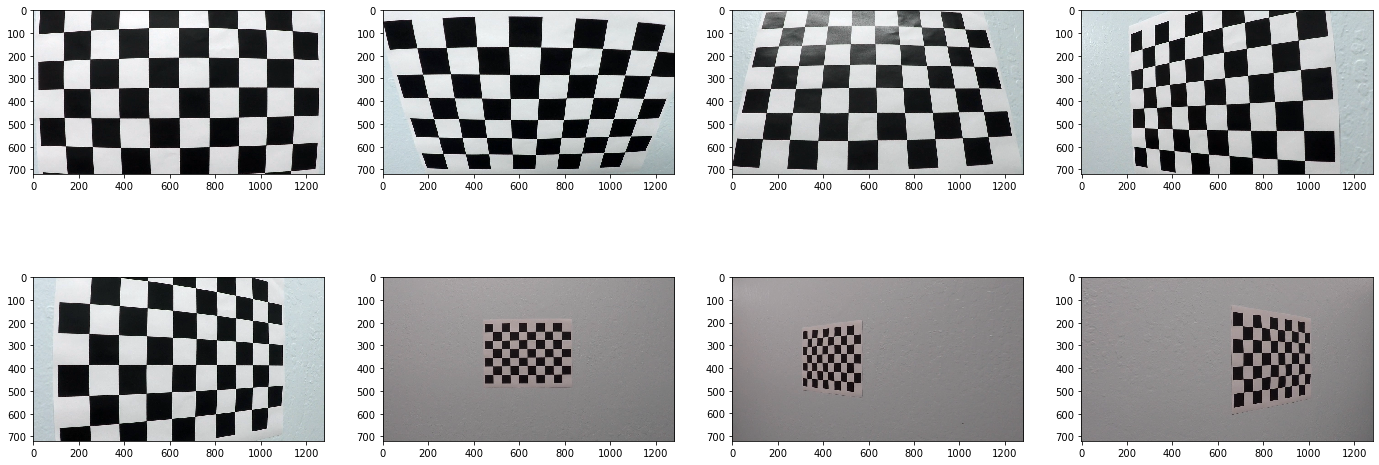

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

f,axes= plt.subplots(2,4, figsize=(24,9))
Nrow=0
Ncolumn=0
DistortedImages=[]
print("Sample of Chess Board Images")
for k in range(8):
    image= cv2.imread("./camera_cal/calibration"+str(k+1)+".jpg")
    DistortedImages.append(image)
    axes[Nrow,Ncolumn].imshow(image)
    Ncolumn+=1
    if(Ncolumn==4):
        Ncolumn=0
        Nrow+=1

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']
camera_cal\calibration1.jpg
camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
ca

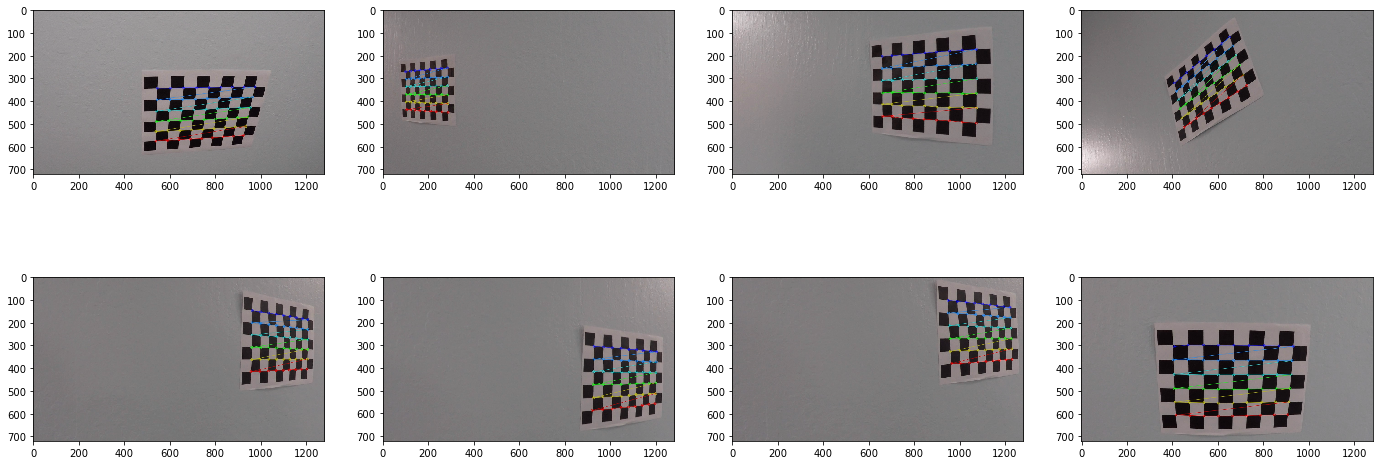

In [9]:
# obtaining 54 chessboard points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
chessp = np.zeros((6*9,3), np.float32)
chessp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
chesspoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print(images)
# Step through the list and search for chessboard corners
i=0
for fname in images:
    img = cv2.imread(fname)
    print(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    # If found, add object points, image points
    if ret == True:
        chesspoints.append(chessp)
        imgpoints.append(corners)
        i=i+1
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        filename="./camera_cal/withcorners/calibrationcorners"+str(i)+".jpg"
        cv2.imwrite(filename, img)
        cv2.waitKey(10)
        cv2.destroyAllWindows()

f,axes= plt.subplots(2,4, figsize=(24,9))
Nrow=0
Ncolumn=0
CornersImages=[]
print("Sample of Chess Board with Corners Images")
for k in range(8):
    image= cv2.imread("./camera_cal/withcorners/calibrationcorners"+str(k+1)+".jpg")
    CornersImages.append(image)
    axes[Nrow,Ncolumn].imshow(image)
    Ncolumn+=1
    if(Ncolumn==4):
        Ncolumn=0
        Nrow+=1
#chesspoints and imgpoints will be used in calibration
print(chessp.shape)
print(corners.shape)

In [31]:
fname='calibration2.jpg'
filename=str(fname[11:])
print(filename)

2.jpg


## Do the calibration given object points and image points

In [41]:
#Camera calibration matrices
img = cv2.imread("camera_cal/calibration2.jpg")
img_size = (img.shape[1], img.shape[0])
print(img_size)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(chesspoints, imgpoints, img_size,None,None)

#Return camera calibration (arrays ret, mtx, dist, rvecs, tvecs )

(1280, 720)


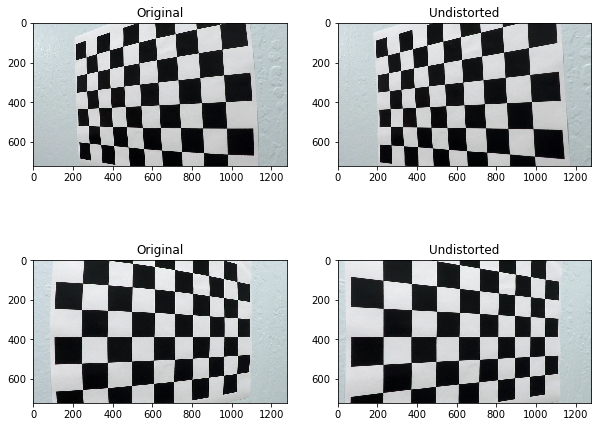

In [45]:
#undistorting calibration4 &5 as an example using 
%matplotlib inline
plt.figure(figsize=(10,8))

img = cv2.imread("camera_cal/calibration4.jpg")
imgg = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.title('Original')
fig =plt.imshow(img)

plt.subplot(2,2,2)
plt.title('Undistorted')
fig =plt.imshow(imgg)


img = cv2.imread("camera_cal/calibration5.jpg")
imgg = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,3)
plt.title('Original')
fig =plt.imshow(img)

plt.subplot(2,2,4)
plt.title('Undistorted')
fig =plt.imshow(imgg)




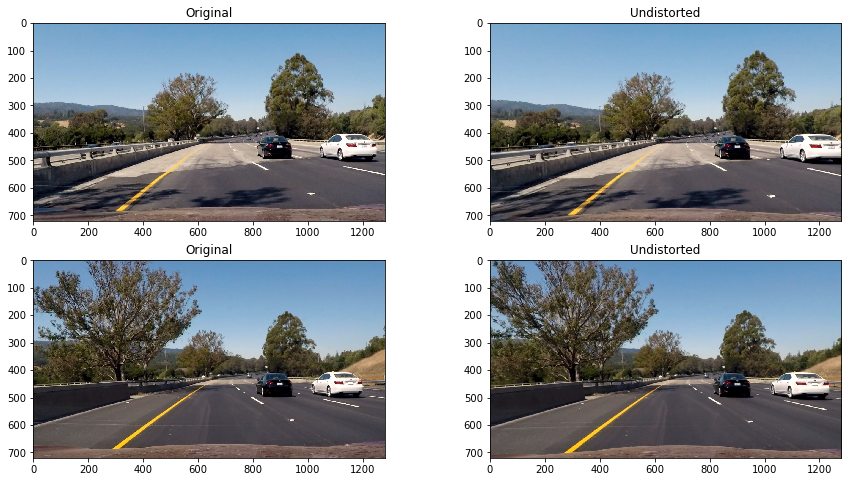

In [46]:
#testing undistortion on road images 
plt.figure(figsize=(15,8))

img = cv2.imread("test_images/test4.jpg")
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgg = cv2.undistort(img_RGB, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.title('Original')
fig =plt.imshow(img_RGB)

plt.subplot(2,2,2)
plt.title('Undistorted')
fig =plt.imshow(imgg)


img = cv2.imread("test_images/test6.jpg")
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgg = cv2.undistort(img_RGB, mtx, dist, None, mtx)

plt.subplot(2,2,3)
plt.title('Original')
fig =plt.imshow(img_RGB)

plt.subplot(2,2,4)
plt.title('Undistorted')
fig =plt.imshow(imgg)


In [51]:
def HLS_ColorThresh(img, LowThresh, HighThresh):
    #HLS color space(Hue (0,180) Light (0,255), satur (0,255))
    img_HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    #binary image of threshold result
    binary_output = np.zeros((img.shape[0], img.shape[1]))
    binary_output[(img_HLS[:,:,0] >= LowThresh[0]) & (img_HLS[:,:,0] <= HighThresh[0]) & (img_HLS[:,:,1] >= LowThresh[1])  & (img_HLS[:,:,1] <= HighThresh[1])  & (img_HLS[:,:,2] >= LowThresh[2]) & (img_HLS[:,:,2] <= HighThresh[2])] = 1
    return binary_output


In [77]:
#defining other types of thresholds or combination of them to test and find the best lane detection possible
#as both L and S channels in HLS color spac can see the lanes, we apply sobelx on thm to detect the vertical lines 
def sobel_x_on_HLS(img, sobel_kernel=3,min_thres = 20, max_thres =100):
    # Apply the following steps to img
    #convert to HLS color space
    imghsl = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #Taking the x gradient on L and S channels
    sobel_x1 = cv2.Sobel(imghsl[:,:,1], cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobel_x2 = cv2.Sobel(imghsl[:,:,2], cv2.CV_64F, 1,0, ksize=sobel_kernel)
        
    #Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel_x1 = np.uint8(255*sobel_x1/ np.max(sobel_x1))
    scaled_sobel_x2 = np.uint8(255*sobel_x2/ np.max(sobel_x2))

    # 5) Create a binary mask where mag thresholds are met
    binary_output_x1 = np.zeros_like(scaled_sobel_x1)
    binary_output_x1[(scaled_sobel_x1 >= min_thres) & (scaled_sobel_x1 <= max_thres)] = 1

    binary_output_x2 = np.zeros_like(scaled_sobel_x2)
    binary_output_x2[(scaled_sobel_x2 >= min_thres) & (scaled_sobel_x2 <= max_thres)] = 1

    binary_output = np.zeros_like(scaled_sobel_x1)
    binary_output[(binary_output_x1 ==1) | (binary_output_x2 ==1)]=1
    # 6) Return this mask as your binary_output image
    return binary_output


def magThresh(img, sobel_kernel=3, mag_thresh=(0, 255)):    
    #grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #Taking the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    #Calculate the magnitude 
    mag_grad = np.sqrt(sobel_x**2 + sobel_y**2)
    
    #Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*mag_grad / np.max(mag_grad))
       
    #Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1


    # 6) Return this mask as your binary_output image
    return binary_output


#Direction threshold
def dirThreshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    #Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #Taking the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)

    #Taking the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)

    #Use np.arctan2(abs_sobel_y, abs_sobel_x) to calculate the direction of the gradient 
    absgraddir = np.arctan2(abs_sobel_y, abs_sobel_x) 

    #Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    #Return this mask as your binary_output image
    return binary_output

#Both Magnitude and direction threshold
def magDirThresh(img, sobel_kernel=3, mag_thresh=(0, 255), dir_thresh=(0,np.pi/2)):
    # Apply the following steps to img
    #Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #Taking the gradient in x and y separately
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=sobel_kernel) 
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    #Calculate the magnitude 
    mag_grad = np.sqrt(sobel_x**2 + sobel_y**2)
    
    #Calc angle
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    absgraddir = np.arctan2(abs_sobel_y, abs_sobel_x) 

    #Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(mag_grad)/255 
    mag_grad2 = (mag_grad/scale_factor).astype(np.uint8) 
       
    #Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(mag_grad)
    binary_output[(mag_grad2 >= mag_thresh[0]) & (mag_grad2 <= mag_thresh[1]) & (absgraddir >= dir_thresh[0]) & (absgraddir <= dir_thresh[1]) ] = 1


    #Return this mask as your binary_output image
    return binary_output



Examples of color thresholds


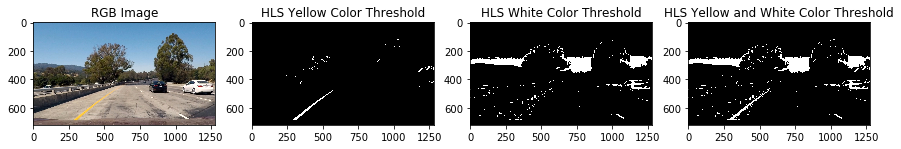

In [67]:
#Testing of color thresholds
# Yellow and white threshold for each left and right lanes, respectively, can be a good combination to detect both lanes.   
img = cv2.imread("test_images/test1.jpg")
#img = cv2.imread("test_images/straight_lines2.jpg")

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


print("Examples of color thresholds")

yellow_low = np.array([0,100,100])
yellow_high = np.array([50,255,255])

white_low = np.array([18,0,180])
white_high = np.array([255,80,255])


imgThres_yellow = HLS_ColorThresh(imgRGB,yellow_low,yellow_high)
imgThres_white = HLS_ColorThresh(imgRGB,white_low,white_high)


imgThres_both =np.zeros_like(imgThres_yellow)

imgThres_both[(imgThres_yellow==1) | (imgThres_white==1)] =1

plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.title('RGB Image')
plt.imshow(imgRGB)
plt.subplot(1,4,2)
plt.title('HLS Yellow Color Threshold')
plt.imshow(imgThres_yellow,cmap ='gray')
plt.subplot(1,4,3)
plt.title('HLS White Color Threshold')
plt.imshow(imgThres_white,cmap ='gray')
plt.subplot(1,4,4)
plt.title('HLS Yellow and White Color Threshold')
plt.imshow(imgThres_both,cmap ='gray')
           



Examples of magnitude and direction thresholds


<Figure size 720x576 with 0 Axes>

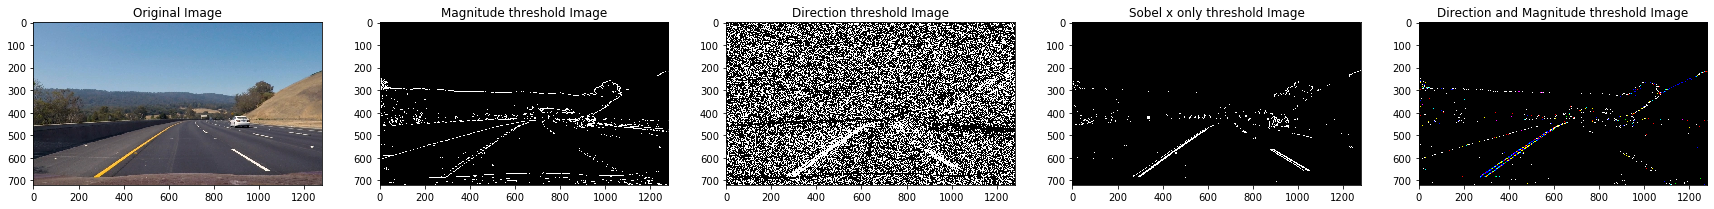

In [90]:
#Examples of magnitude and direction thresholds
plt.figure(figsize=(10,8))

img = cv2.imread("test_images/test3.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Only magnitude
magThr =magThresh(imgRGB, 3, (30, 100))

#Only direction
dirThr =dirThreshold(imgRGB, 9,(0.7, 1.3))

#Both
magdirThr =magDirThresh(imgRGB, 3, (30, 100),(0.7, 1.3)) 

#Sobel x only
imgThr = sobel_x_on_HLS(imgRGB,9,80,220) #Sobel x

print("Examples of magnitude and direction thresholds")
plt.figure(figsize=(30,20))

plt.subplot(1,5,1)
plt.title('Original Image')
fig =plt.imshow(imgRGB)

plt.subplot(1,5,2)
plt.title('Magnitude threshold Image')
fig =plt.imshow(magThr,cmap = 'gray')

plt.subplot(1,5,3)
plt.title('Direction threshold Image')
fig =plt.imshow(dirThr,cmap = 'gray')

plt.subplot(1,5,4)
plt.title('Sobel x only threshold Image')
fig =plt.imshow(imgThr,cmap = 'gray')


#imgThresColor = HLS_ColorThresh(imgRGB,(20,30),(150,255),(200,255))
#imgThr =magDirThresh(imgThresColor, 3, (30, 255),(np.pi/2*50/90, np.pi/2*90/90)) #Both

plt.subplot(1,5,5)
plt.title('Direction and Magnitude threshold Image')
fig =plt.imshow(magdirThr,cmap = 'gray')

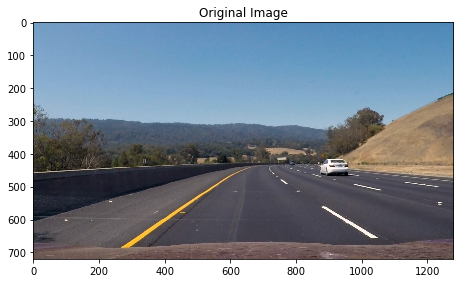

In [91]:
img = cv2.imread("test_images/test3.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20))

plt.subplot(4,1,1)
plt.title('Original Image')
fig =plt.imshow(imgRGB)


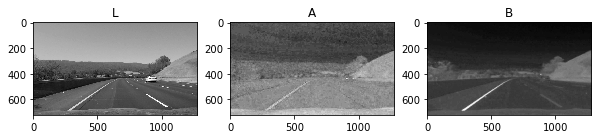

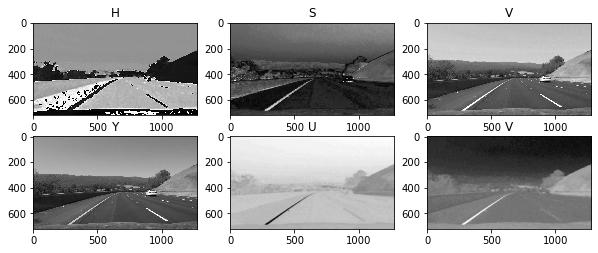

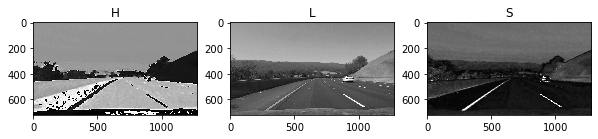

In [92]:
#Test to see the effects of HSL channel and comparing it with LAB, HSV and YUV
#1) LAB
img = cv2.imread("test_images/test3.jpg")
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.figure(figsize=(10,8))
plt.subplot(4,3,1)
plt.title('L')
fig =plt.imshow(imgHSV[:,:,0],cmap='gray')
plt.subplot(4,3,2)
plt.title('A')
fig =plt.imshow(imgHSV[:,:,1],cmap='gray')
plt.subplot(4,3,3)
plt.title('B')
fig =plt.imshow(imgHSV[:,:,2],cmap='gray')
#2)HSV
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(10,8))
plt.subplot(4,3,4)
plt.title('H')
fig =plt.imshow(imgHSV[:,:,0],cmap='gray')
plt.subplot(4,3,5)
plt.title('S')
fig =plt.imshow(imgHSV[:,:,1],cmap='gray')
plt.subplot(4,3,6)
plt.title('V')
fig =plt.imshow(imgHSV[:,:,2],cmap='gray')
#3)YUV
imgYUV = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plt.subplot(4,3,7)
plt.title('Y')
fig =plt.imshow(imgYUV[:,:,0],cmap='gray')
plt.subplot(4,3,8)
plt.title('U')
fig =plt.imshow(imgYUV[:,:,1],cmap='gray')
plt.subplot(4,3,9)
plt.title('V')
fig =plt.imshow(imgYUV[:,:,2],cmap='gray')
#4)HLS
imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.figure(figsize=(10,8))
plt.subplot(4,3,10)
plt.title('H')
fig =plt.imshow(imgHLS[:,:,0],cmap='gray')
plt.subplot(4,3,11)
plt.title('L')
fig =plt.imshow(imgHLS[:,:,1],cmap='gray')
plt.subplot(4,3,12)
plt.title('S')
fig =plt.imshow(imgHLS[:,:,2],cmap='gray')

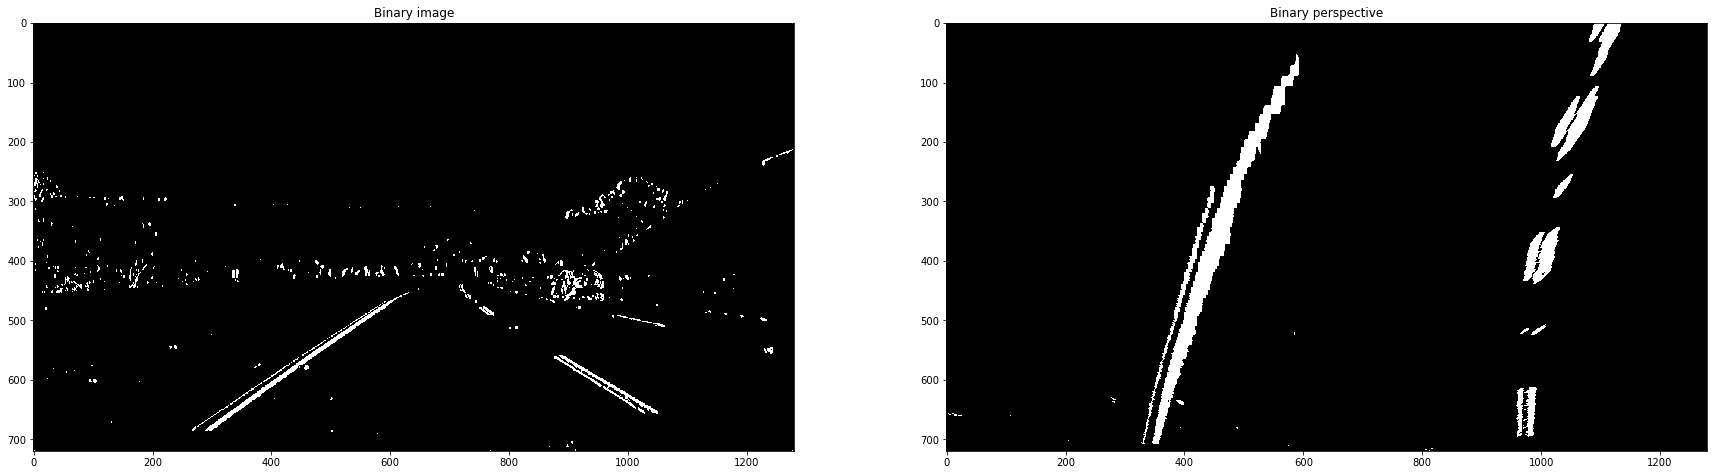

In [118]:
#Perspective transfomation to get Bird's-eye view
#src and dst are provided in writeup template
src = np.float32([[585, 450], [203, 720], [1127, 720], [695, 450]])
dst = np.float32([[320, 0], [320, 720], [960,720], [960, 0]])

M_persp = cv2.getPerspectiveTransform(src, dst)
Minv_persp = cv2.getPerspectiveTransform(dst, src)

img_size = (imgThr.shape[1], imgThr.shape[0])
binary_warped = cv2.warpPerspective(imgThr, M_persp, img_size, flags=cv2.INTER_LINEAR)


plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.title('Binary image')
fig =plt.imshow(imgThr, cmap='gray')

plt.subplot(1,2,2)
plt.title('Binary perspective')
fig =plt.imshow(binary_warped, cmap='gray')

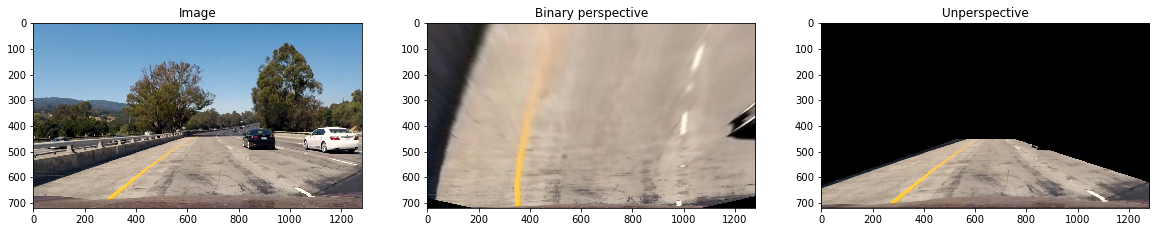

In [121]:
#Perspective transfomation
img = cv2.imread("test_images/test1.jpg")
#img = cv2.imread("test_images/straight_lines2.jpg")

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.undistort(imgRGB, mtx, dist, None, mtx)

img_size = (img2.shape[1], img2.shape[0])

RGB_warped = cv2.warpPerspective(img2, M_persp, img_size, flags=cv2.INTER_LINEAR)


plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plt.title('Image')
fig =plt.imshow(imgRGB)

plt.subplot(1,3,2)
plt.title('Binary perspective')
fig =plt.imshow(RGB_warped)



img_unpersp = cv2.warpPerspective(RGB_warped, Minv_persp, img_size, flags=cv2.INTER_LINEAR)
plt.subplot(1,3,3)
plt.title('Unperspective')
fig =plt.imshow(img_unpersp)



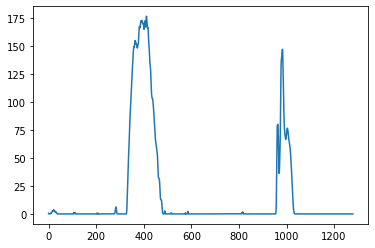

In [131]:
#a histogram on pixls densities can giv us som peaks for th lans
# for the bottom half of the image, Lane lines are likely to be mostly vertical nearest to the car
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)


In [136]:
#print(binary_warped.shape)
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255


midpoint = np.int(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

print("leftx_base",leftx_base, "rightx_base",rightx_base)

nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()



leftx_base 411 rightx_base 983


In [123]:
def fitlines(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    
   
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    
    # Fit a second order polynomial to each
    if len(leftx) == 0:
        left_fit =[]
    else:
        left_fit = np.polyfit(lefty, leftx, 2)
    
    if len(rightx) == 0:
        right_fit =[]
    else:
        right_fit = np.polyfit(righty, rightx, 2)
    

    
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]


    return left_fit, right_fit,out_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 1280, 3)
255.0


<ipython-input-142-d0c5b44e1324>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ok


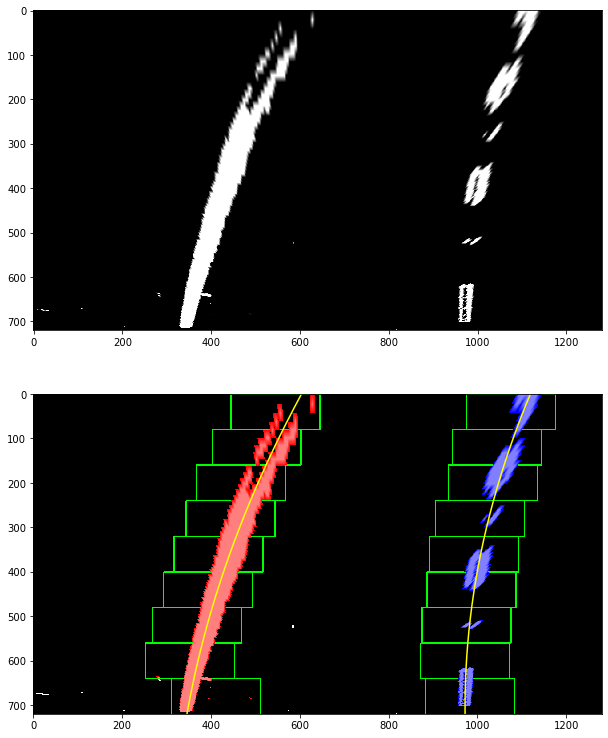

In [142]:
#Visualization of lines fitted
img = cv2.imread("test_images/test3.jpg")
#img = cv2.imread("test_images/straight_lines2.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_undist = cv2.undistort(imgRGB, mtx, dist, None, mtx)

#2.Magnitude Threshold
#Threshold color    
yellow_low = np.array([0,100,100])
yellow_high = np.array([50,255,255])
white_low = np.array([18,0,180])
white_high = np.array([255,80,255])
global ref_left 
global ref_right
global left_fit
global right_fit

imgThres_yellow = HLS_ColorThresh(img_undist,yellow_low,yellow_high)
imgThres_white = HLS_ColorThresh(img_undist,white_low,white_high)
imgThr_sobelx = sobel_x_on_HLS(img_undist,9,80,220) #Sobel x

img_mag_thr =np.zeros_like(imgThres_yellow)
#imgThresColor[(imgThres_yellow==1) | (imgThres_white==1)] =1
img_mag_thr[(imgThres_yellow==1) | (imgThres_white==1) | (imgThr_sobelx==1)] =1
#img_mag_thr[(imgThres_yellow==1) | (imgThres_white==1)] =1


#3. Birds-eye
#Perspective array pre-calculated
img_size = (img_mag_thr.shape[1], img_mag_thr.shape[0])
binary_warped = cv2.warpPerspective(img_mag_thr, M_persp, img_size, flags=cv2.INTER_LINEAR)

left_fit, right_fit,out_img = fitlines(binary_warped)


print(out_img.shape)
print(np.max(out_img))


ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    

plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
plt.imshow(binary_warped, cmap='gray')

plt.subplot(3,1,2)

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

plt.subplot(3,1,2)
binary_warped2 = np.zeros((720, 1280,3))
binary_warped2[:,:,0] = binary_warped
binary_warped2[:,:,1] = binary_warped
binary_warped2[:,:,2] = binary_warped
plt.imshow(out_img)
result = cv2.addWeighted(binary_warped2, 0.5, out_img, 0.5, 0)
plt.imshow(result)
print("ok")

In [125]:

def fit_continuous(left_fit, right_fit, binary_warped):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    if len(leftx) == 0:
        #if the window wasn't covering the lane pixels then we update left_fit as n empty array  
        left_fit_updated =[]
    else:
        left_fit_updated = np.polyfit(lefty, leftx, 2)
    
    
    if len(rightx) == 0:
        right_fit_updated =[]
    else:
        right_fit_updated = np.polyfit(righty, rightx, 2)
        
    return  left_fit_updated, right_fit_updated


In [126]:
#Calc Curvature
def curvature(left_fit, right_fit, binary_warped):
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    y_eval = np.max(ploty)
    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension


    # Fit new polynomials to x,y in world space
    #leftx = left_fit[0]*ploty**2+left_fit[1]*ploty+left_fit[2]
    #rightx = right_fit[0]*ploty**2+right_fit[1]*ploty+left_fit[2]
        
    #left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    #right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    center = (((left_fit[0]*720**2+left_fit[1]*720+left_fit[2]) +(right_fit[0]*720**2+right_fit[1]*720+right_fit[2]) ) /2 - 640)*xm_per_pix
    
    # Now our radius of curvature is in meters
    #print(left_curverad, 'm', right_curverad, 'm')
    return left_curverad, right_curverad, center

In [127]:
#Draw line and return image

def drawLine(undist, warped,left_fit, right_fit):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    # Fit new polynomials to x,y in world space
    left_fitx = left_fit[0]*ploty**2+left_fit[1]*ploty+left_fit[2]
    right_fitx = right_fit[0]*ploty**2+right_fit[1]*ploty+right_fit[2] 
    
    #print(left_fitx)
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))


    #print(np.int_(pts))


    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (255,215, 0))

    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv_persp, (color_warp.shape[1], color_warp.shape[0])) 

    # Combine the result with the original image
    
    #print("undist", undist.shape)
    #print("newwarp", newwarp.shape)
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    #result = cv2.addWeighted(undist, 0, newwarp, 1, 0)
    return(result, color_warp)

In [143]:
def sanity_check(left_fit, right_fit, minSlope, maxSlope):
    #To confirm that your detected lane lines are real, you might consider:
    #Checking that they have similar curvature
    #Checking that they are separated by approximately the right distance horizontally
    #Checking that they are roughly parallel
   
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    #Check 1: check if left and right fits exists
    #Check 2: Calculates the tangent between left and right in two points, and check if it is in a reasonable threshold
    if len(left_fit) ==0 or len(right_fit) == 0:
        status = False
        d0=0
        d1=0
        #Previous fitlines routine returns empty list to them if not finds
    else:
        #Difference of slope
        L_0 = 2*left_fit[0]*460+left_fit[1]
        R_0 = 2*right_fit[0]*460+right_fit[1]
        d0 =  np.abs(L_0-R_0)

        L_1 = 2*left_fit[0]*720+left_fit[1]
        R_1 = 2*right_fit[0]*720+right_fit[1]
        d1 =  np.abs(L_1-R_1)

        
        if d0>= minSlope and d0<= maxSlope and d1>= minSlope and d1<= maxSlope:
            status = True
        else:
            status = False
            
    return(status, d0, d1)
        

In [144]:
#Function to process the image
global counter
counter=0
ref_left =np.array([-0.0001,0,400])
ref_right=np.array([-0.0001,0,1000])   
left_fit =np.array([-0.0001,0,400])
right_fit=np.array([-0.0001,0,1000])   



def process_image(image):
    #1. Camera correction
    #Calibration arrays pre-calculated
    img_undist = cv2.undistort(image, mtx, dist, None, mtx)
    global counter
    
    #2.Magnitude Threshold
    #Threshold color    
    yellow_low = np.array([0,100,100])
    yellow_high = np.array([50,255,255])
    white_low = np.array([18,0,180])
    white_high = np.array([255,80,255])
    global ref_left 
    global ref_right
    global left_fit
    global right_fit

    imgThres_yellow = HLS_ColorThresh(img_undist,yellow_low,yellow_high)
    imgThres_white = HLS_ColorThresh(img_undist,white_low,white_high)
    imgThr_sobelx = sobel_x_on_HLS(img_undist,9,80,220) #Sobel x

    img_mag_thr =np.zeros_like(imgThres_yellow)
    #imgThresColor[(imgThres_yellow==1) | (imgThres_white==1)] =1
    img_mag_thr[(imgThres_yellow==1) | (imgThres_white==1) | (imgThr_sobelx==1)] =1
        
    #3. Birds-eye
    #Perspective array pre-calculated
    img_size = (img_mag_thr.shape[1], img_mag_thr.shape[0])
    binary_warped = cv2.warpPerspective(img_mag_thr, M_persp, img_size, flags=cv2.INTER_LINEAR)
    
    #4. Detect lanes and return fit curves
    
    if counter==0:
        left_fit, right_fit,out_imgfit = fitlines(binary_warped)
    else:
        left_fit, right_fit = fit_continuous(left_fit, right_fit, binary_warped)
    
    
    #Project video (2.8, 3.5)
    status_sanity, d0, d1 =sanity_check(left_fit, right_fit, 0, .55)
    #Challenge video (2.4,3.1)
    #status_sanity, d0, d1, d2 =sanity_check(left_fit, right_fit, 2.4,3.1)
    
    #print(left_fit)
    #print(right_fit)
    
    #Calc curvature and center
    if status_sanity  == True:        
        #Save as last reliable fit
        ref_left, ref_right = left_fit, right_fit        
        counter+=1
    else:        #Use the last realible fit (the last time that status_sanity was True)
        left_fit, right_fit = ref_left, ref_right
        
    left_curv, right_curv, center_off = curvature(left_fit, right_fit, binary_warped)

    #Warp back to original and merge with image    
    img_merge, img_birds = drawLine(img_undist, binary_warped,left_fit, right_fit)

    #Composition of images to final display
    img_out=np.zeros((576,1280,3), dtype=np.uint8)

    img_out[0:576,0:1024,:] =cv2.resize(img_merge,(1024,576))
    #b) Threshold
    img_out[0:288,1024:1280, 0] =cv2.resize(img_mag_thr*255,(256,288))
    img_out[0:288,1024:1280, 1] =cv2.resize(img_mag_thr*255,(256,288))
    img_out[0:288,1024:1280, 2] =cv2.resize(img_mag_thr*255,(256,288))
    #c)Birds eye view
    img_out[310:576,1024:1280,:] =cv2.resize(img_birds,(256,266))
    
    
    #Write curvature and center in image
    TextL = "Left curv: " + str(int(left_curv)) + " m"
    TextR = "Right curv: " + str(int(right_curv))+ " m"
    TextC = "Center offset: " + str(round( center_off,2)) + "m"
    #TextAux = str(status_sanity) + ", d0: " + str(round(d0,2)) + ", d1: " + str(round(d1,2))
    fontScale=1
    thickness=2
    
    fontFace = cv2.FONT_HERSHEY_SIMPLEX


    cv2.putText(img_out, TextL, (130,40), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, TextR, (130,70), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, TextC, (130,100), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    #cv2.putText(img_out, TextAux, (100,130), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)

    cv2.putText(img_out, "Thresh. view", (1070,30), fontFace, .8,(200,200,0), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, "Birds-eye", (1080,305), fontFace, .8,(200,200,0), thickness,  lineType = cv2.LINE_AA)
        
    
    #return img_out, binary_warped, left_curv, right_curv, left_fit, right_fit   
    return img_out 
    
        

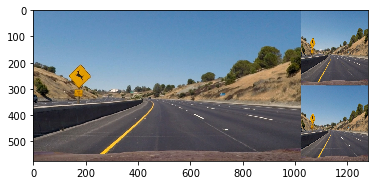

In [145]:
#Test composition images
img = cv2.imread("test_images/test2.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_out=np.zeros((576,1280,3), dtype=np.uint8)

img_out[0:576,0:1024,0:3] =cv2.resize(imgRGB,(1024,576))
#b) Threshold
img_out[0:288,1024:1280, :] =cv2.resize(imgRGB,(256,288))
#c)Birds eye view
img_out[288:576,1024:1280,:] =cv2.resize(imgRGB,(256,288))


#img2 = cv2.resize(imgRGB,(1024,576))
plt.imshow(img_out)

<Figure size 720x1080 with 0 Axes>

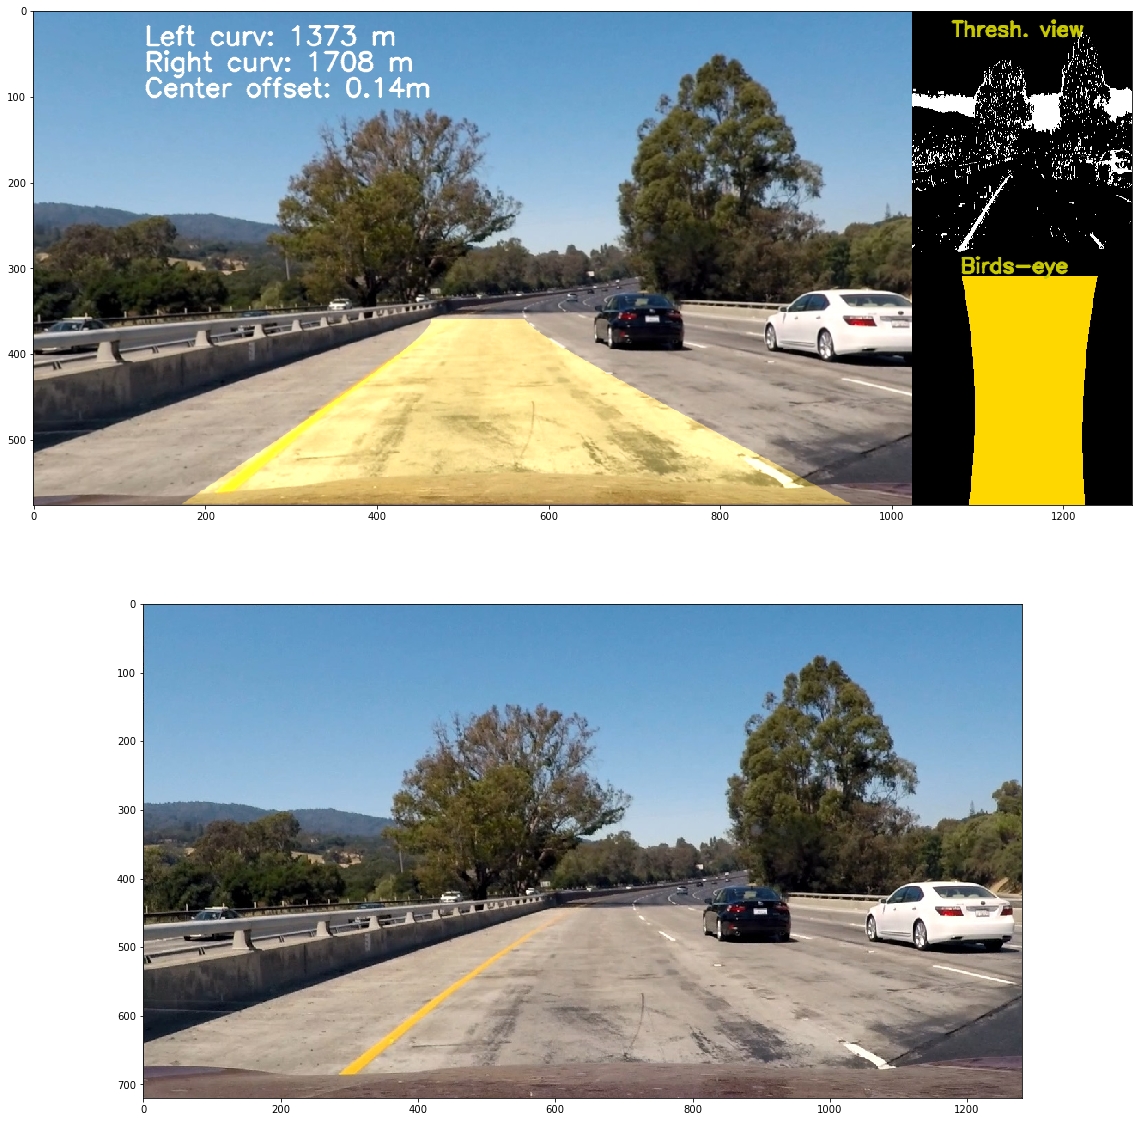

In [146]:
img = cv2.imread("test_images/test1.jpg")
#img = cv2.imread("test_images/straight_lines1.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2= process_image(imgRGB)

plt.figure(figsize=(10,15))
#plt.figure(figsize=(5,10))

  
plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
plt.imshow(img2)
plt.subplot(2,1,2)
plt.imshow(imgRGB)


In [152]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import moviepy as mve


In [155]:
#Create video file pipeline
counter=0
output = 'out_test_video2.mp4'
clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(22,25)
#clip1 = VideoFileClip("challenge_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")

#clip1.save_frame("frame.jpeg")
#clip1 = clip1.fx(mve.vfx.rotate, lambda t: 90*t, expand=False)
out_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)
print(counter)

                                                              
t:   6%|▌         | 77/1260 [09:23<04:41,  4.20it/s, now=None]
                                                              
t:   6%|▌         | 78/1260 [08:54<05:29,  3.59it/s, now=None]

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video out_test_video2.mp4.
Moviepy - Writing video out_test_video2.mp4





t:   0%|          | 2/1260 [00:00<03:04,  6.82it/s, now=None]

t:   0%|          | 3/1260 [00:00<03:53,  5.38it/s, now=None]

t:   0%|          | 4/1260 [00:00<04:22,  4.79it/s, now=None]

t:   0%|          | 5/1260 [00:01<04:41,  4.45it/s, now=None]

t:   0%|          | 6/1260 [00:01<04:51,  4.30it/s, now=None]

t:   1%|          | 7/1260 [00:01<04:53,  4.27it/s, now=None]

t:   1%|          | 8/1260 [00:01<04:50,  4.31it/s, now=None]

t:   1%|          | 9/1260 [00:02<04:35,  4.55it/s, now=None]

t:   1%|          | 10/1260 [00:02<04:49,  4.32it/s, now=None]

t:   1%|          | 11/1260 [00:02<05:02,  4.13it/s, now=None]

t:   1%|          | 12/1260 [00:02<04:59,  4.17it/s, now=None]

t:   1%|          | 13/1260 [00:03<05:00,  4.14it/s, now=None]

t:   1%|          | 14/1260 [00:03<05:02,  4.11it/s, now=None]

t:   1%|          | 15/1260 [00:03<05:03,  4.10it/s, now=None]

t:   1%|▏         | 16/1260 [00:03<05:09,  4.02it/s, now=None]

t:   1%|▏         | 17/1260 [00:03<05:03,  4.0

t:  18%|█▊        | 233/1260 [01:02<04:33,  3.75it/s, now=None]

t:  19%|█▊        | 234/1260 [01:02<04:45,  3.59it/s, now=None]

t:  19%|█▊        | 235/1260 [01:03<04:50,  3.53it/s, now=None]

t:  19%|█▊        | 236/1260 [01:03<04:43,  3.61it/s, now=None]

t:  19%|█▉        | 237/1260 [01:03<04:33,  3.75it/s, now=None]

t:  19%|█▉        | 238/1260 [01:03<04:25,  3.85it/s, now=None]

t:  19%|█▉        | 239/1260 [01:04<04:20,  3.91it/s, now=None]

t:  19%|█▉        | 240/1260 [01:04<04:25,  3.84it/s, now=None]

t:  19%|█▉        | 241/1260 [01:04<04:33,  3.73it/s, now=None]

t:  19%|█▉        | 242/1260 [01:04<04:28,  3.80it/s, now=None]

t:  19%|█▉        | 243/1260 [01:05<04:30,  3.76it/s, now=None]

t:  19%|█▉        | 244/1260 [01:05<04:27,  3.80it/s, now=None]

t:  19%|█▉        | 245/1260 [01:05<04:29,  3.76it/s, now=None]

t:  20%|█▉        | 246/1260 [01:05<04:26,  3.81it/s, now=None]

t:  20%|█▉        | 247/1260 [01:06<04:32,  3.72it/s, now=None]

t:  20%|█▉        | 248/1

t:  37%|███▋      | 463/1260 [02:02<03:27,  3.85it/s, now=None]

t:  37%|███▋      | 464/1260 [02:02<03:30,  3.79it/s, now=None]

t:  37%|███▋      | 465/1260 [02:03<03:32,  3.74it/s, now=None]

t:  37%|███▋      | 466/1260 [02:03<03:34,  3.71it/s, now=None]

t:  37%|███▋      | 467/1260 [02:03<03:29,  3.78it/s, now=None]

t:  37%|███▋      | 468/1260 [02:03<03:23,  3.88it/s, now=None]

t:  37%|███▋      | 469/1260 [02:04<03:21,  3.93it/s, now=None]

t:  37%|███▋      | 470/1260 [02:04<03:29,  3.76it/s, now=None]

t:  37%|███▋      | 471/1260 [02:04<03:32,  3.71it/s, now=None]

t:  37%|███▋      | 472/1260 [02:05<03:33,  3.70it/s, now=None]

t:  38%|███▊      | 473/1260 [02:05<03:34,  3.67it/s, now=None]

t:  38%|███▊      | 474/1260 [02:05<03:32,  3.70it/s, now=None]

t:  38%|███▊      | 475/1260 [02:05<03:35,  3.65it/s, now=None]

t:  38%|███▊      | 476/1260 [02:06<03:29,  3.73it/s, now=None]

t:  38%|███▊      | 477/1260 [02:06<03:26,  3.80it/s, now=None]

t:  38%|███▊      | 478/1

t:  55%|█████▌    | 693/1260 [03:00<02:20,  4.03it/s, now=None]

t:  55%|█████▌    | 694/1260 [03:00<02:22,  3.97it/s, now=None]

t:  55%|█████▌    | 695/1260 [03:00<02:17,  4.09it/s, now=None]

t:  55%|█████▌    | 696/1260 [03:00<02:17,  4.11it/s, now=None]

t:  55%|█████▌    | 697/1260 [03:01<02:16,  4.12it/s, now=None]

t:  55%|█████▌    | 698/1260 [03:01<02:18,  4.05it/s, now=None]

t:  55%|█████▌    | 699/1260 [03:01<02:18,  4.05it/s, now=None]

t:  56%|█████▌    | 700/1260 [03:01<02:16,  4.09it/s, now=None]

t:  56%|█████▌    | 701/1260 [03:02<02:13,  4.18it/s, now=None]

t:  56%|█████▌    | 702/1260 [03:02<02:13,  4.18it/s, now=None]

t:  56%|█████▌    | 703/1260 [03:02<02:13,  4.19it/s, now=None]

t:  56%|█████▌    | 704/1260 [03:02<02:12,  4.20it/s, now=None]

t:  56%|█████▌    | 705/1260 [03:03<02:13,  4.14it/s, now=None]

t:  56%|█████▌    | 706/1260 [03:03<02:16,  4.07it/s, now=None]

t:  56%|█████▌    | 707/1260 [03:03<02:20,  3.92it/s, now=None]

t:  56%|█████▌    | 708/1

t:  73%|███████▎  | 923/1260 [03:57<01:26,  3.91it/s, now=None]

t:  73%|███████▎  | 924/1260 [03:57<01:25,  3.92it/s, now=None]

t:  73%|███████▎  | 925/1260 [03:57<01:23,  4.03it/s, now=None]

t:  73%|███████▎  | 926/1260 [03:58<01:21,  4.12it/s, now=None]

t:  74%|███████▎  | 927/1260 [03:58<01:20,  4.15it/s, now=None]

t:  74%|███████▎  | 928/1260 [03:58<01:21,  4.10it/s, now=None]

t:  74%|███████▎  | 929/1260 [03:58<01:20,  4.12it/s, now=None]

t:  74%|███████▍  | 930/1260 [03:59<01:18,  4.18it/s, now=None]

t:  74%|███████▍  | 931/1260 [03:59<01:20,  4.10it/s, now=None]

t:  74%|███████▍  | 932/1260 [03:59<01:20,  4.06it/s, now=None]

t:  74%|███████▍  | 933/1260 [03:59<01:21,  4.02it/s, now=None]

t:  74%|███████▍  | 934/1260 [04:00<01:20,  4.04it/s, now=None]

t:  74%|███████▍  | 935/1260 [04:00<01:22,  3.94it/s, now=None]

t:  74%|███████▍  | 936/1260 [04:00<01:21,  3.95it/s, now=None]

t:  74%|███████▍  | 937/1260 [04:00<01:23,  3.86it/s, now=None]

t:  74%|███████▍  | 938/1

t:  91%|█████████▏| 1150/1260 [05:01<00:27,  3.95it/s, now=None]

t:  91%|█████████▏| 1151/1260 [05:01<00:27,  3.96it/s, now=None]

t:  91%|█████████▏| 1152/1260 [05:01<00:27,  3.96it/s, now=None]

t:  92%|█████████▏| 1153/1260 [05:02<00:26,  3.98it/s, now=None]

t:  92%|█████████▏| 1154/1260 [05:02<00:26,  3.98it/s, now=None]

t:  92%|█████████▏| 1155/1260 [05:02<00:26,  3.97it/s, now=None]

t:  92%|█████████▏| 1156/1260 [05:02<00:26,  4.00it/s, now=None]

t:  92%|█████████▏| 1157/1260 [05:03<00:25,  4.04it/s, now=None]

t:  92%|█████████▏| 1158/1260 [05:03<00:25,  3.97it/s, now=None]

t:  92%|█████████▏| 1159/1260 [05:03<00:25,  3.93it/s, now=None]

t:  92%|█████████▏| 1160/1260 [05:03<00:25,  3.89it/s, now=None]

t:  92%|█████████▏| 1161/1260 [05:04<00:25,  3.90it/s, now=None]

t:  92%|█████████▏| 1162/1260 [05:04<00:25,  3.81it/s, now=None]

t:  92%|█████████▏| 1163/1260 [05:04<00:25,  3.77it/s, now=None]

t:  92%|█████████▏| 1164/1260 [05:04<00:24,  3.84it/s, now=None]

t:  92%|██

Moviepy - Done !
Moviepy - video ready out_test_video2.mp4
Wall time: 5min 31s
1261


In [156]:
HTML("""
<video  width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))